<a href="https://colab.research.google.com/github/iMrugesh9/Clustering_sentiment_Zomato/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lightgbm import LGBMClassifier
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('omw-1.4')
import gensim
from gensim.models import Word2Vec
from nltk.stem.wordnet import WordNetLemmatizer



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading first dataset
dataset_restos=pd.read_csv('/content/drive/MyDrive/Datasets/UNsuper/Zomato Restaurant names and Metadata.csv')

In [ ]:
# Loading second Dataset
Dataset_reviews=pd.read_csv('/content/drive/MyDrive/Datasets/UNsuper/Zomato Restaurant reviews.csv')


In [ ]:
# observing dataset
dataset_restos.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# observing dataset
dataset_restos.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
# observing dataset
Dataset_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# observing dataset
Dataset_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In the restaurant dataset, the Name refers to the Name of the Restaurants. 

In [ ]:
# changing Name to Restaurant
dataset_restos.rename(columns={'Name':'Restaurant'},inplace=True)


In [ ]:
# merging two datasets on Restaurant column
Dataset=pd.merge(dataset_restos,Dataset_reviews,on='Restaurant')

In [ ]:
Dataset.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# data columns summary of restaurant dataset
dataset_restos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurant   105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


As we can see there are 5 attributes for 105 unique restaurants are provided, out of which Collections column has 51 Null values, and Timings has 1 Null value.

In [ ]:
# data columns summary of review dataset
Dataset_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Review Dataset has 10000 entries of reviews with 6 attributes for each reviews. Except Pictures, every column has Null values, although the Null value fraction is less than 1%. 

In [ ]:
# Cost unique values
dataset_restos.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

# EDA



*   Cost Values have commas in the values, so the format of the Cost values need to change.
*   The Links Column is of no use, it is just an information.
*   Collections has more than 50% Null values, So the column needs to be dropped.




In [ ]:
# changing cost values datatype and formatting
dataset_restos['Cost']=dataset_restos.Cost.str.replace(',','')
dataset_restos['Cost']=dataset_restos['Cost'].astype(float)

In [ ]:
# dropping collection column
X=dataset_restos.iloc[:,2:]
X.drop(columns='Collections',inplace=True)
X

,Cost,Cuisines,Timings
0,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,800.0,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,1300.0,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,1200.0,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...
100,600.0,"Fast Food, Salad",11 AM to 11 PM
101,200.0,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,500.0,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,250.0,Fast Food,8am to 12:30AM (Mon-Sun)


There Are more than one cuisines for most of the resturants, We must find the unique cuisines and their count. 

In [ ]:
# Timing unique values
dataset_restos['Timings'].value_counts()

11 AM to 11 PM                                                                                                                                                              6
12 Noon to 11 PM                                                                                                                                                            5
12 Noon to 12 Midnight                                                                                                                                                      5
12 Noon to 10:30 PM                                                                                                                                                         3
11:30 AM to 1 AM                                                                                                                                                            3
                                                                                                                                  

As we can see, there are 77 unique entries in all different format for Timings column. Now it will be impractical to clean and transform 77 unique  values for 105 total values. So for further analysis, Timings will not be considered.

In [ ]:
# removing unnecassary spaces in cuisines column
X['Cuisines']=X.Cuisines.str.replace(' ','')

In [ ]:
# Cuisine counter
cuisines_list=[]
cuisines_counter={}
for i in X.Cuisines:
  temp=i.split(',')
  for j in temp:
    if j not in cuisines_list:
      cuisines_list.append(j)
      cuisines_counter[j]=1
    else:
      cuisines_counter[j]=cuisines_counter[j]+1
    
len(cuisines_list)

44

In [ ]:
# Cuisine counter data frame
df_cuisine_count=pd.DataFrame({'Cuisines':cuisines_counter.keys(),'Count':cuisines_counter.values()})

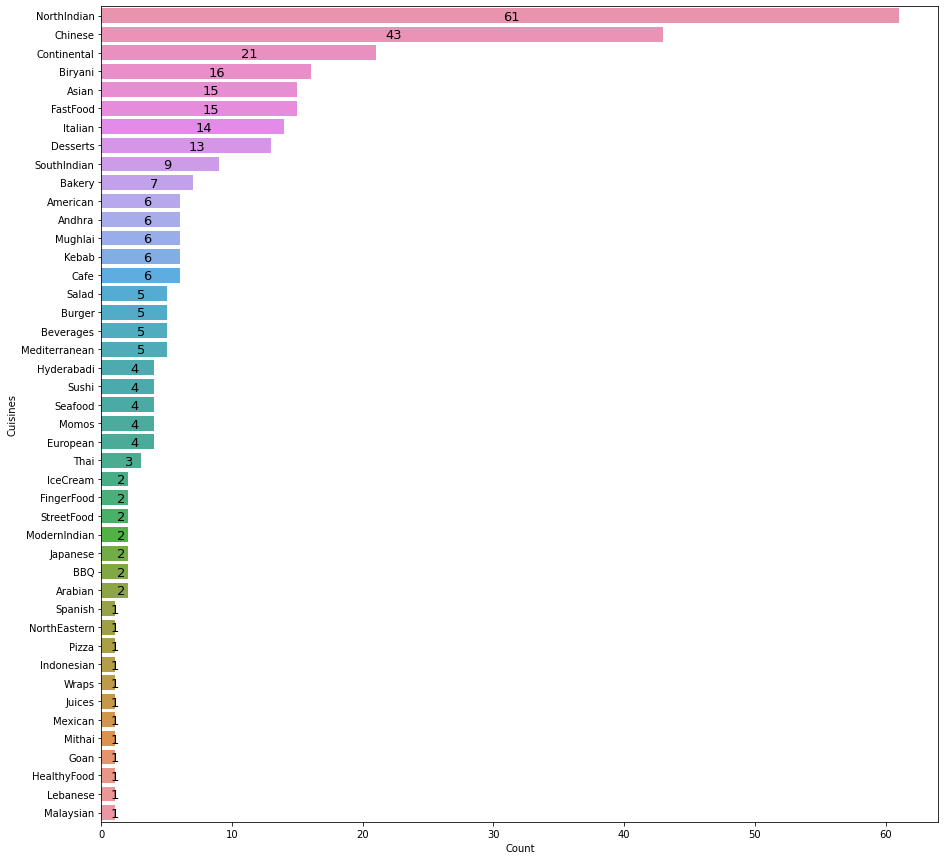

In [ ]:
# plotting cuisine counts
plt.figure(figsize=(15,15))
ax=sns.barplot(x='Count',y='Cuisines',data=df_cuisine_count,order=df_cuisine_count.sort_values('Count').Cuisines)
plt.gca().invert_yaxis()
for p in ax.patches:
  _x = ( p.get_x() + p.get_width() + float(0.4))/2
  _y = p.get_y() + p.get_height()*0.2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=13)



As we can see only 8 cuisines have double-digit counts out of 44 distinct cuisines. Now it would be ineffective if we consider 44 distinct cuisines for clustering as there are only 105 restaurants to cluster. It can be useful if we categorize these cuisines in to more understandable *cuisine category*, based on the attribute to cluster the restaurants easily.

In [ ]:
# categorizing the cuisines
keywords_temp={'overseas':['Chinese','Continental','European','Asian','Mediterranean','Lebanese','American','BBQ','Italian','Japanese','Sushi','Mexican','Mughlai','Arabian','Spanish','Thai','Indonesian','Malaysian'],
          'North_Indian' : ['Kebab','NorthIndian','Biryani','ModernIndian','NorthEastern'],
          'South_Indian' :['SouthIndian','Goan','Andhra','Hyderabadi','Seafood'],
         'Fast_food' : ['FastFood','Beverages','StreetFood','FingerFood','Burger','Salad','Bakery','Juices','Cafe','Wraps','Momos','Pizza'],
         'IceCream_sweets' : ['Desserts','IceCream','Mithai','HealthyFood'],
         }


In [ ]:
# dictoinary for cuisine category-cuisine pairs
keywords = {}
for key,value in keywords_temp.items():
    for val in value:
        if val in keywords:
            keywords[val].append(key)
        else:
            keywords[val] = key
keywords            

{'Chinese': 'overseas',
 'Continental': 'overseas',
 'European': 'overseas',
 'Asian': 'overseas',
 'Mediterranean': 'overseas',
 'Lebanese': 'overseas',
 'American': 'overseas',
 'BBQ': 'overseas',
 'Italian': 'overseas',
 'Japanese': 'overseas',
 'Sushi': 'overseas',
 'Mexican': 'overseas',
 'Mughlai': 'overseas',
 'Arabian': 'overseas',
 'Spanish': 'overseas',
 'Thai': 'overseas',
 'Indonesian': 'overseas',
 'Malaysian': 'overseas',
 'Kebab': 'North_Indian',
 'NorthIndian': 'North_Indian',
 'Biryani': 'North_Indian',
 'ModernIndian': 'North_Indian',
 'NorthEastern': 'North_Indian',
 'SouthIndian': 'South_Indian',
 'Goan': 'South_Indian',
 'Andhra': 'South_Indian',
 'Hyderabadi': 'South_Indian',
 'Seafood': 'South_Indian',
 'FastFood': 'Fast_food',
 'Beverages': 'Fast_food',
 'StreetFood': 'Fast_food',
 'FingerFood': 'Fast_food',
 'Burger': 'Fast_food',
 'Salad': 'Fast_food',
 'Bakery': 'Fast_food',
 'Juices': 'Fast_food',
 'Cafe': 'Fast_food',
 'Wraps': 'Fast_food',
 'Momos': 'Fast_

In [ ]:
# function for categorizing the cuisines
def rename_cuisines(cuisine):
  newlist=[]
  str=cuisine.split(',')
  newlist=[x.replace(x,keywords[x]) for x in str]
  str1=""
  for ele in newlist: 
    str1 += ele+','
  return str1


In [ ]:
# preparing the dataset with renamed cuisines
X_cat=X.copy()
X_cat['Cuisines']=X.Cuisines.apply(rename_cuisines)
X_cat


,Cost,Cuisines,Timings
0,800.0,"overseas,overseas,North_Indian,overseas,South_...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,800.0,"North_Indian,North_Indian,overseas,",11 AM to 11 PM
2,1300.0,"overseas,overseas,North_Indian,IceCream_sweets,","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,800.0,"North_Indian,North_Indian,overseas,South_India...",12 Noon to 2 AM
4,1200.0,"overseas,overseas,North_Indian,overseas,overseas,","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...
100,600.0,"Fast_food,Fast_food,",11 AM to 11 PM
101,200.0,"Fast_food,IceCream_sweets,","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,500.0,"North_Indian,North_Indian,overseas,",12 Noon to 11 PM
103,250.0,"Fast_food,",8am to 12:30AM (Mon-Sun)


Now that the cuisines are categorized proparly, in order to use it for clustering converting them to numeric form can be helpful. CountVectorizer can be useful for doing that. 

In [ ]:
# CountVectorizer for counting cuisine categories
count_vectorizer = CountVectorizer()
C_train_count = count_vectorizer.fit_transform(X_cat.Cuisines)
C_train_count.toarray()[:2]
cuisines_columns=count_vectorizer.vocabulary_.keys()

In [ ]:
count_vectorizer.get_feature_names()

['fast_food', 'icecream_sweets', 'north_indian', 'overseas', 'south_indian']

In [ ]:
# Converting to dataframe
Cuisine_df=pd.DataFrame(C_train_count.todense(), columns=count_vectorizer.get_feature_names())

In [ ]:
Cuisine_df

,fast_food,icecream_sweets,north_indian,overseas,south_indian
0,0,0,2,3,1
1,0,0,2,1,0
2,0,1,1,2,0
3,1,0,2,1,1
4,0,0,1,4,0
...,...,...,...,...,...
100,2,0,0,0,0
101,1,1,0,0,0
102,0,0,2,1,0
103,1,0,0,0,0


Most restaurants have mixed cuisine categories. It can be interesting to see the distribution of cuisine categories for such restaurants.

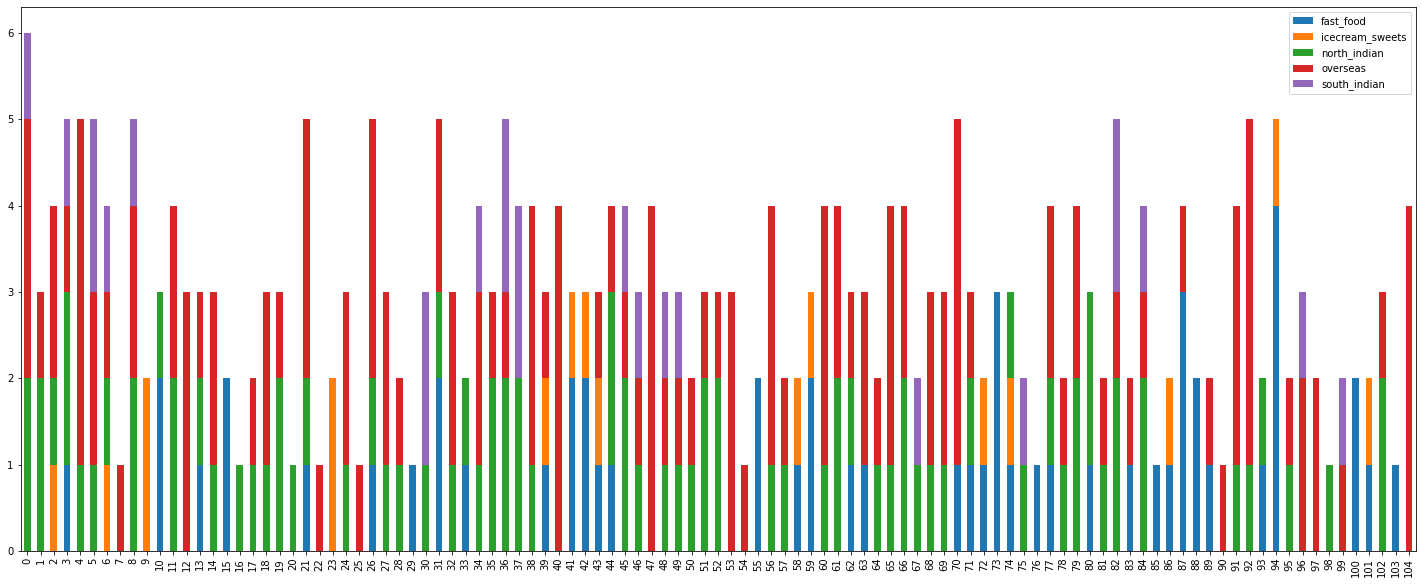

In [ ]:
# plotting bar plot of cuisine categories
Cuisine_df.plot(kind='bar', stacked=True,figsize=(25,10))


As we can see most restaurants has multiple categories mixed, although some has one dominating category.

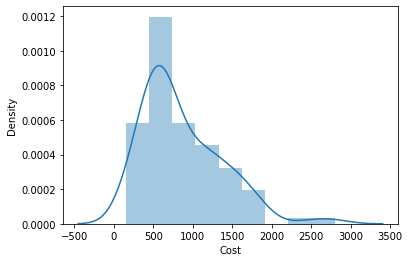

In [ ]:
# Cost distribution
sns.distplot(dataset_restos['Cost'])
plt.show()

Cost values distribution is very close to normal distributions as we can see in the plot above. 

In [ ]:
#description of cost values 
dataset_restos.describe()['Cost']

count     105.000000
mean      861.428571
std       510.149730
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [ ]:
# Preparing data for clustering
X_train=pd.concat([X.Cost,Cuisine_df],axis=1)
X_train


,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian
0,800.0,0,0,2,3,1
1,800.0,0,0,2,1,0
2,1300.0,0,1,1,2,0
3,800.0,1,0,2,1,1
4,1200.0,0,0,1,4,0
...,...,...,...,...,...,...
100,600.0,2,0,0,0,0
101,200.0,1,1,0,0,0
102,500.0,0,0,2,1,0
103,250.0,1,0,0,0,0


In [ ]:
# Normalizing cost column
X_train_norm=X_train.copy()
scaler_rec_mon=preprocessing.StandardScaler()
X_train_norm=scaler_rec_mon.fit_transform(X_train)

# Clustering

In [ ]:
# libraries for shap 
from sklearn.model_selection import cross_val_score
!pip install shap
import shap 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.9 MB/s 


## KMeans

In [ ]:
# experimenting with range of number of clusters
X_rec_mon=X_train.values.copy()
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_rec_mon)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_rec_mon, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6509930042899373
For n_clusters = 3, silhouette score is 0.5899448802060923
For n_clusters = 4, silhouette score is 0.5907809917310518
For n_clusters = 5, silhouette score is 0.554290642689755
For n_clusters = 6, silhouette score is 0.5873980456701143
For n_clusters = 7, silhouette score is 0.5790355596078034
For n_clusters = 8, silhouette score is 0.5949224628136482
For n_clusters = 9, silhouette score is 0.625141153860996
For n_clusters = 10, silhouette score is 0.6316049867036635


From silhoute score with KMeans , optimum number of clusters with 0.651 score is 2.

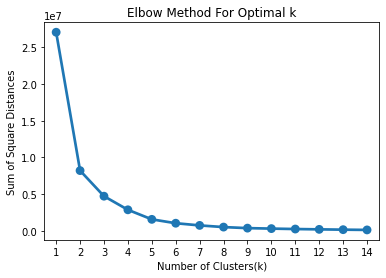

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_rec_mon)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method also confirms the same number of optimum clusters.

We can further validate the efficacy, we can fit the data to machine learning model and check f1 score.

In [ ]:
# building KMeans model 
clusterer_km = KMeans(n_clusters=2)
clusters_km= clusterer_km.fit_predict(X_rec_mon)

In [ ]:
# building classifier model
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X_rec_mon, clusters_km, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 1.0


### Explainability

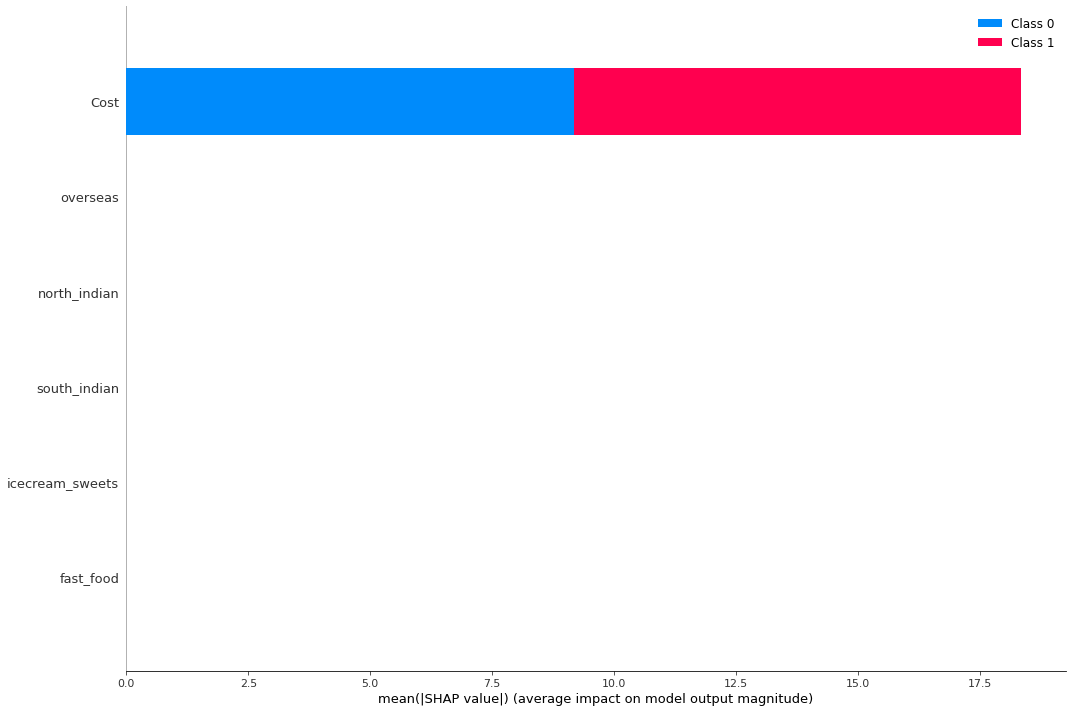

In [ ]:
# shap value explainer
clf_kp.fit(X_rec_mon, clusters_km)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_km = explainer_kp.shap_values(X_rec_mon)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))


We can see that Only cost is the important feature for clustering, using KMeans.

### Normalized values

Similar analysis for normalized values.

In [ ]:
X_rec_mon=X_train_norm.copy()
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_rec_mon)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X_rec_mon, preds)

Optimum number of cluster is 5 for normalized values, considering silhoute score using KMeans method.

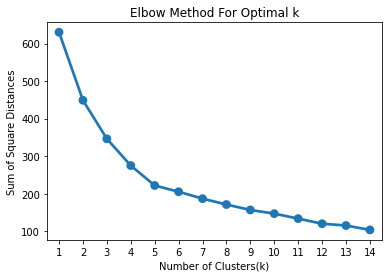

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_rec_mon)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method confirms the same.

In [ ]:
clusterer_km = KMeans(n_clusters=5)
clusters_km= clusterer_km.fit_predict(X_rec_mon)

In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X_rec_mon, clusters_km, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.5191246848389706


F1 score of 0.86 is achieved for the classifier model, which is moderate code.

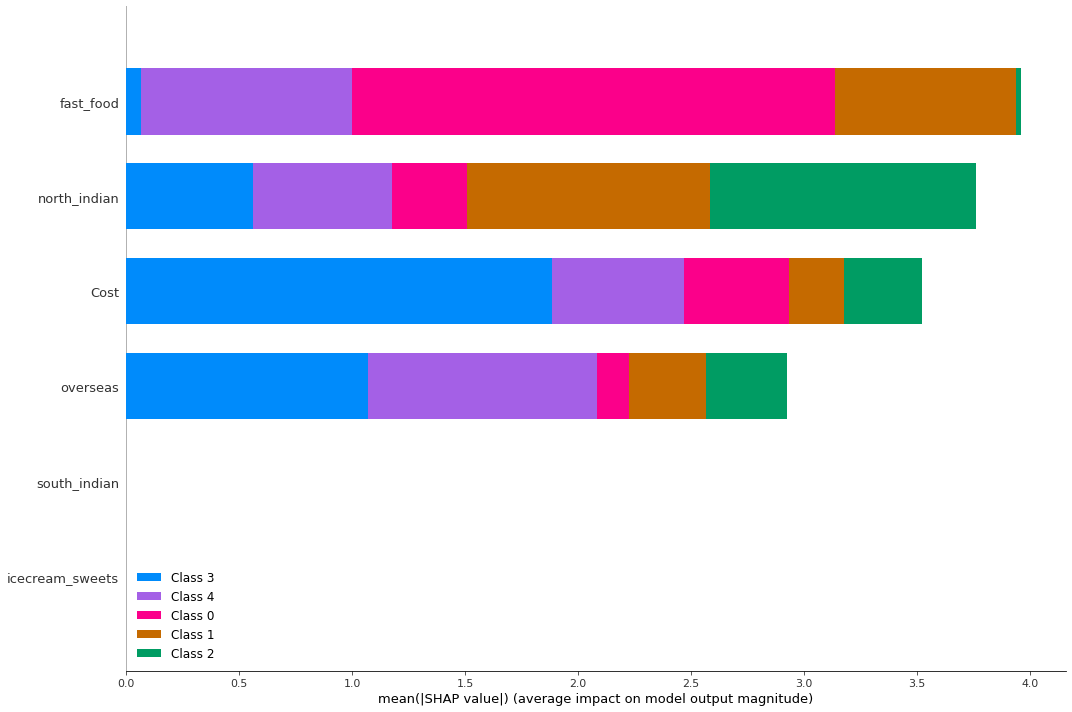

In [ ]:
clf_kp.fit(X_rec_mon, clusters_km)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_km = explainer_kp.shap_values(X_rec_mon)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))


When the normalized values are considered for clustering we can see there is a contributions from other features as well, with fast_food and north_indian category being the most important features.




## Hierarchichal  

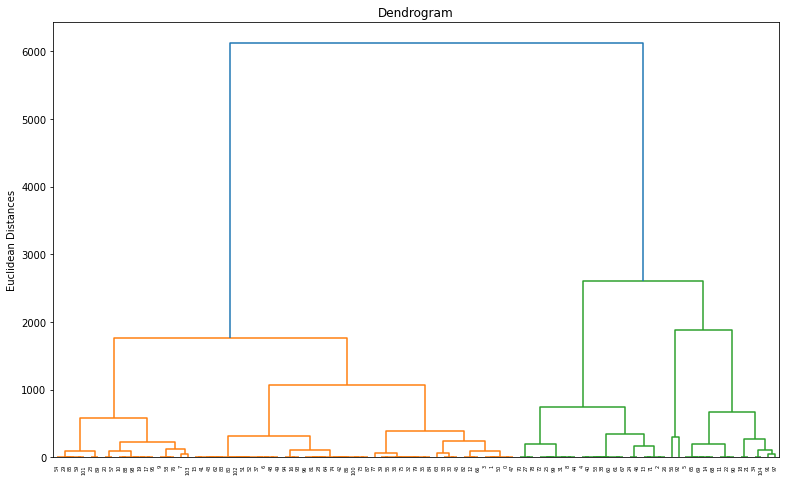

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For actual values, optimum number of clusters according to Dendrogram is 2. 

### Normalized Values

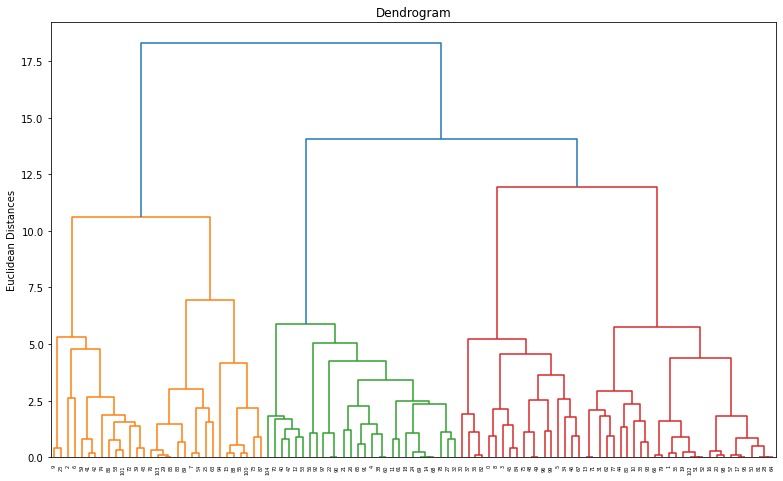

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_train_norm, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For Normalized values, optimized number of clusters is 3.

## KPrototypes

In [ ]:
#downloading the kmodes library
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# extracting dataset values
mark_array=X_train.values

In [ ]:
# converting the numerical features into float data type
mark_array[:, 0] = mark_array[:, 0].astype(float)


In [ ]:
costs=[]
for i in range(2,7):
  kproto = KPrototypes(n_clusters=i, verbose=2,max_iter=20)
  clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);
  costs.append(kproto.cost_)
  print("For n_clusters = {}, cost is {}".format(n_clusters, kproto.cost_))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3, ncost: 8252028.448949905
Run: 1, iteration: 2/20, moves: 0, ncost: 8252028.448949905
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 11, ncost: 10824316.207750922
Run: 2, iteration: 2/20, moves: 17, ncost: 8286423.88901839
Run: 2, iteration: 3/20, moves: 2, ncost: 8252028.448949905
Run: 2, iteration: 4/20, moves: 0, ncost: 8252028.448949905
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 9, ncost: 8375181.915015087
Run: 3, iteration: 2/20, moves: 0, ncost: 8375181.915015087
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 3, ncost: 8252028.448949905
Run: 4, iteration: 2/20, moves: 0, ncost: 8252028.448949905
In

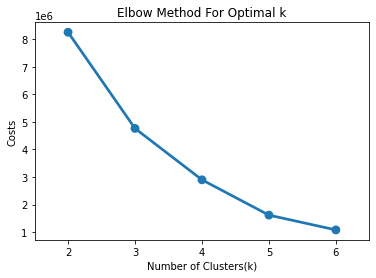

In [ ]:
sns.pointplot(x = list(range(2,7)), y = costs)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Costs')
plt.title('Elbow Method For Optimal k')
plt.show()

For KPrototype method, acoording to elbow method optimum number of clusters is 3.

In [ ]:

kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4, ncost: 4761374.924906865
Run: 1, iteration: 2/20, moves: 0, ncost: 4761374.924906865
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 21, ncost: 4802346.182622914
Run: 2, iteration: 2/20, moves: 2, ncost: 4761374.924906865
Run: 2, iteration: 3/20, moves: 0, ncost: 4761374.924906865
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 31, ncost: 5533204.972917528
Run: 3, iteration: 2/20, moves: 13, ncost: 5151490.846188277
Run: 3, iteration: 3/20, moves: 0, ncost: 5151490.846188277
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 4, ncost: 4963114.747387816
Run:

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
X_kprop=X_train.copy()
X_kprop['cluster']=cluster_dict
X_kprop

,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian,cluster
0,800.0,0,0,2,3,1,1
1,800.0,0,0,2,1,0,1
2,1300.0,0,1,1,2,0,2
3,800.0,1,0,2,1,1,1
4,1200.0,0,0,1,4,0,2
...,...,...,...,...,...,...,...
100,600.0,2,0,0,0,0,1
101,200.0,1,1,0,0,0,1
102,500.0,0,0,2,1,0,1
103,250.0,1,0,0,0,0,1


In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, mark_array, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.8575889507318077


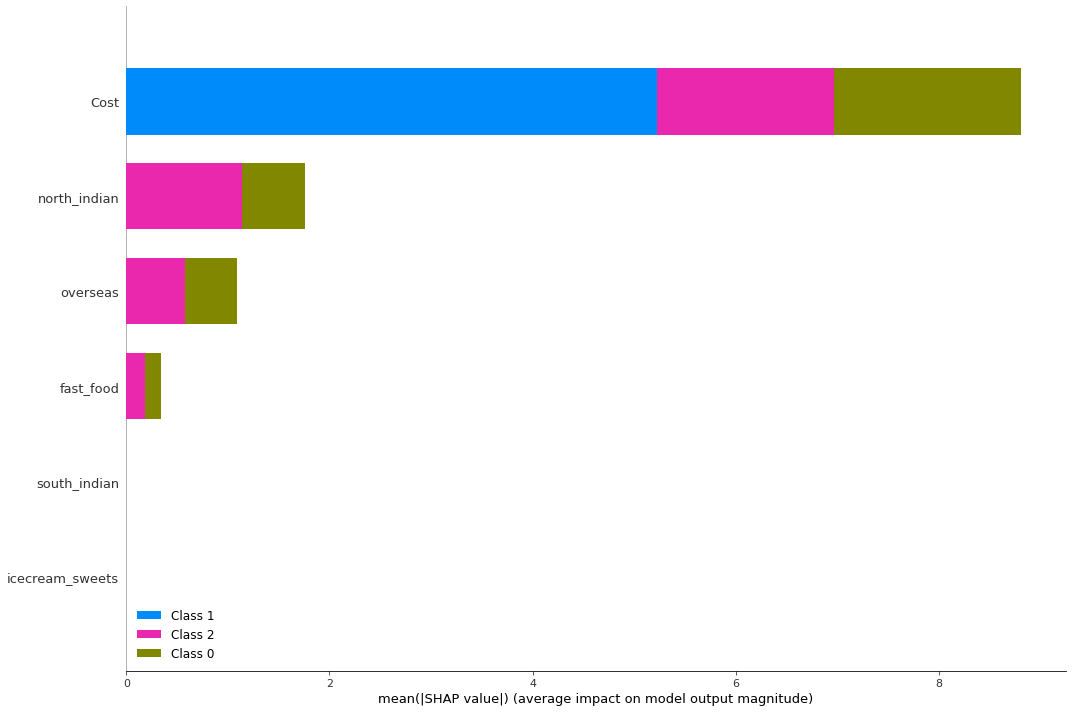

In [ ]:
clf_kp.fit(mark_array, clusters)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(mark_array)
shap.summary_plot(shap_values_kp, X_train, plot_type="bar", plot_size=(15, 10))


As we can see for actual value, KPrototype method has optimum cluster number is 3. And upon fitting the data with classifier, produced 0.91 f1 score which is excellent.
And SHAP explainer shows that cost is the primary feature for clustering, with overseas category as secondary feature.
Class 2 has highest effct by cost, while class 1 is affected by fast_food and noeth_indian categories. Class 0 is mostly shared among overseas and cost.

### Normalized values

In [ ]:
mark_array=X_train_norm.copy()

In [ ]:
mark_array[:, 0] = mark_array[:, 0].astype(float)


In [ ]:
costs=[]
for i in range(2,7):
  kproto = KPrototypes(n_clusters=i, verbose=2,max_iter=20)
  clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);
  costs.append(kproto.cost_)
  print("For n_clusters = {}, cost is {}".format(n_clusters, kproto.cost_))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 21, ncost: 124.78276205456511
Run: 1, iteration: 2/20, moves: 8, ncost: 122.33163744164882
Run: 1, iteration: 3/20, moves: 1, ncost: 122.29302620374673
Run: 1, iteration: 4/20, moves: 0, ncost: 122.29302620374673
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 22, ncost: 142.30777443757924
Run: 2, iteration: 2/20, moves: 18, ncost: 129.90711357926614
Run: 2, iteration: 3/20, moves: 12, ncost: 123.40143141551539
Run: 2, iteration: 4/20, moves: 2, ncost: 122.26773079939886
Run: 2, iteration: 5/20, moves: 0, ncost: 122.26773079939886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 19, ncost: 139.40178323234673
Run: 3, iteration: 2/20, moves: 14, ncost: 128.8606024361971
Run: 3, 

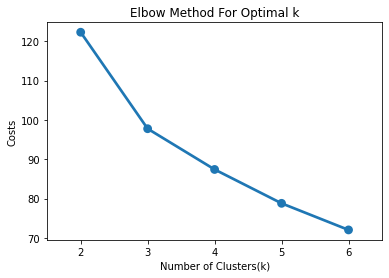

In [ ]:
sns.pointplot(x = list(range(2,7)), y = costs)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Costs')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 24, ncost: 106.10034547971567
Run: 1, iteration: 2/20, moves: 13, ncost: 98.13629597753717
Run: 1, iteration: 3/20, moves: 10, ncost: 97.92350001083545
Run: 1, iteration: 4/20, moves: 0, ncost: 97.92350001083545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 33, ncost: 105.25206108530561
Run: 2, iteration: 2/20, moves: 8, ncost: 105.22036393120987
Run: 2, iteration: 3/20, moves: 0, ncost: 105.22036393120987
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 26, ncost: 98.34484086276626
Run: 3, iteration: 2/20, moves: 8, ncost: 97.90334519441409
Run: 3, iteration: 3/20, moves: 0, ncost: 97.90334519441409
Init: initializing centroids
Init: initializing clusters
Starting iteration

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
X_kprop=X_train.copy()
X_kprop['cluster']=cluster_dict
X_kprop

,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian,cluster
0,800.0,0,0,2,3,1,0
1,800.0,0,0,2,1,0,0
2,1300.0,0,1,1,2,0,2
3,800.0,1,0,2,1,1,0
4,1200.0,0,0,1,4,0,2
...,...,...,...,...,...,...,...
100,600.0,2,0,0,0,0,1
101,200.0,1,1,0,0,0,1
102,500.0,0,0,2,1,0,0
103,250.0,1,0,0,0,0,1


In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8,random_state=50)
cv_scores_kp = cross_val_score(clf_kp, mark_array, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.9293732499747538


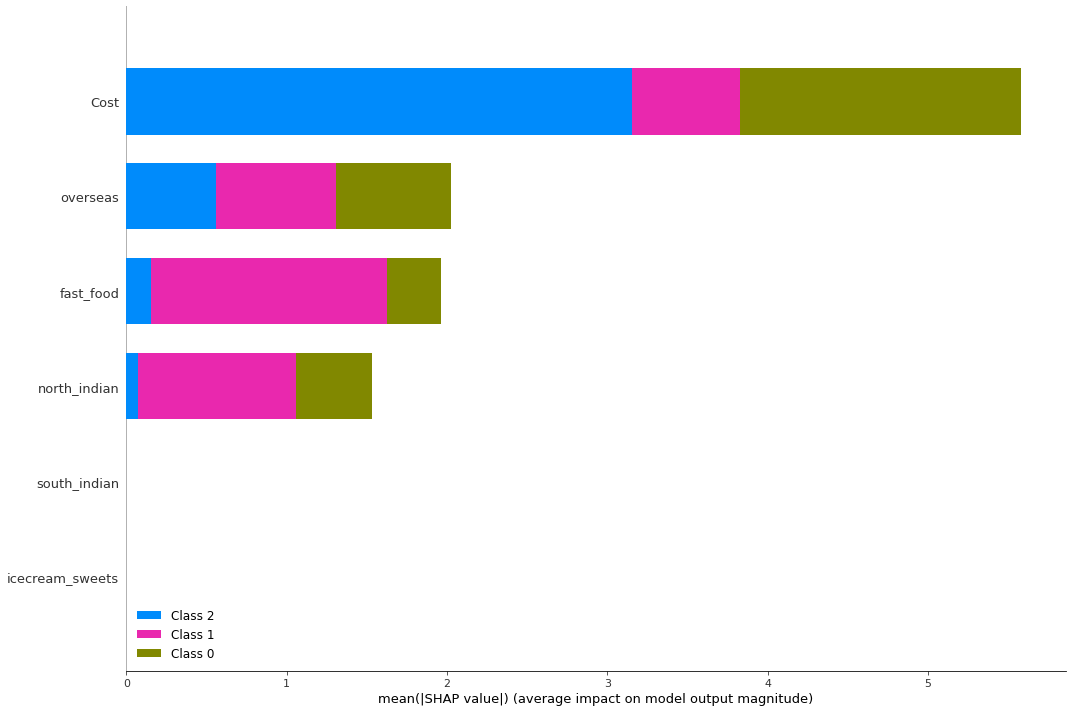

In [ ]:
clf_kp.fit(mark_array, clusters)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(mark_array)
shap.summary_plot(shap_values_kp, X_train, plot_type="bar", plot_size=(15, 10))


As we can see that with KPrototype method for normalized values produced similar results as actual values. Additionaly producing 0.93 f1 score, which is better than previous.

## Summary

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "Actual Values", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "Actual Values", "2"])
myTable.add_row(['3',"K-Means with silhouette_score ", "Normalized Values", "5"]) 
myTable.add_row(['4',"K-Means with Elbow methos  ", "Normalized Values", "5"])
myTable.add_row(['5',"Hierarchichal  ", "Actual Values", "2"]) 
myTable.add_row(['6',"Hierarchichal  ", "Normalized values", "3"])

myTable.add_row(['7',"K-Prototype with elbow method ", "Actual Values", "3"]) 
myTable.add_row(['8',"K-Prototype with elbow method", "Normalized Values", "3"]) 
print(myTable)

+--------+--------------------------------+-------------------+---------------------------+
| SL No. |           Model_Name           |        Data       | Optimal_Number_of_cluster |
+--------+--------------------------------+-------------------+---------------------------+
|   1    | K-Means with silhouette_score  |   Actual Values   |             2             |
|   2    |  K-Means with Elbow methos     |   Actual Values   |             2             |
|   3    | K-Means with silhouette_score  | Normalized Values |             5             |
|   4    |  K-Means with Elbow methos     | Normalized Values |             5             |
|   5    |        Hierarchichal           |   Actual Values   |             2             |
|   6    |        Hierarchichal           | Normalized values |             3             |
|   7    | K-Prototype with elbow method  |   Actual Values   |             3             |
|   8    | K-Prototype with elbow method  | Normalized Values |             3   

#Sentiment Analysis

In [ ]:
# summary of review dataset
Dataset_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# function for converting strings to numeric
def TO_NUMERIC(str):
  try:
    return pd.to_numeric(str)
  except:
      pass

In [ ]:
# applying numeric conversion function to rating column
Dataset_reviews.Rating=Dataset_reviews.Rating.apply(TO_NUMERIC)

In [ ]:
# dropping the null values
Dataset_reviews.dropna(inplace=True)

In [ ]:
Dataset_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


As we can see, there is no NULL values present in the dataset and rating values are float.


## Top/worst Apps according to rating 

In [ ]:
# grouping restaurants
Resto_group=Dataset_reviews.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)

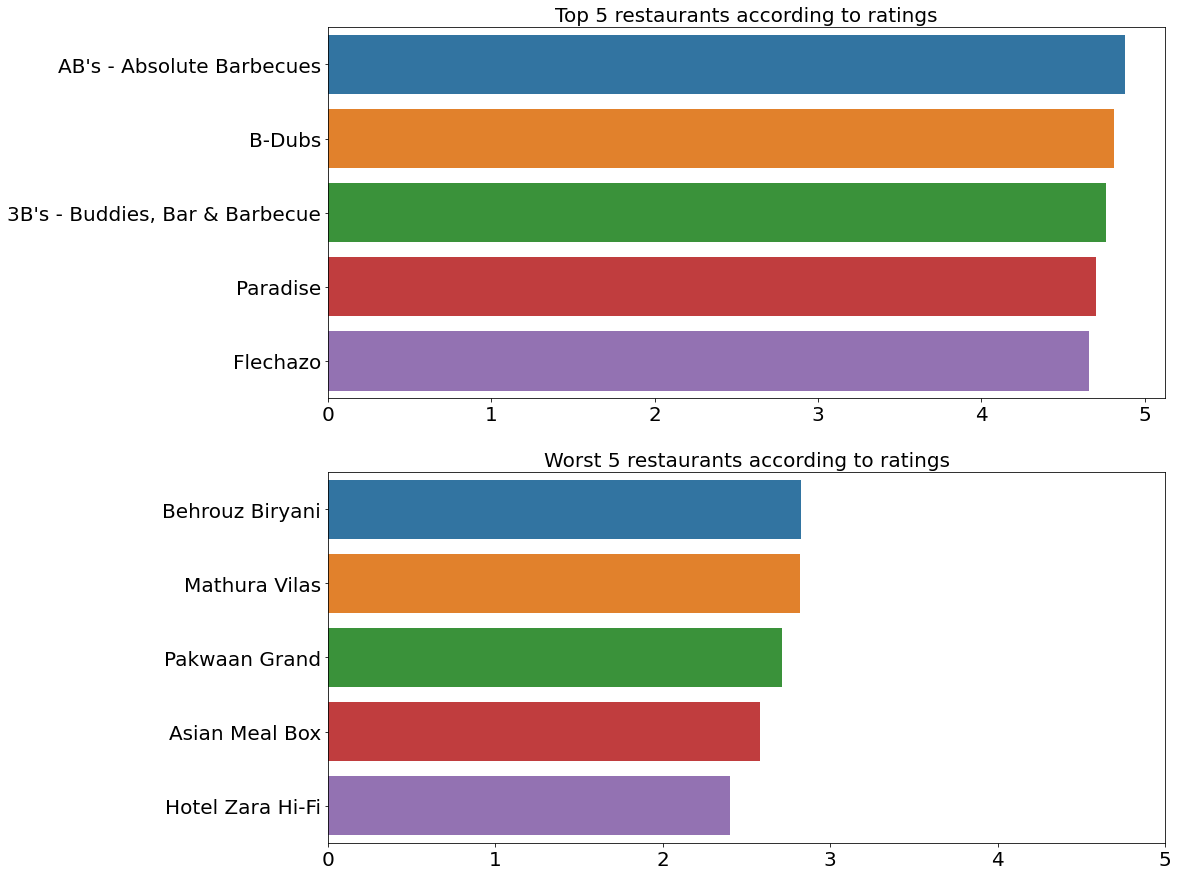

In [ ]:
# PLotting Top and Worst restos according to rating
fig,axs=plt.subplots(2,1,figsize=(15,15))
sns.barplot(y=list(Resto_group[:5].index),x=Resto_group[:5].values,ax=axs[0])
axs[0].set_title('Top 5 restaurants according to ratings')
for item in ([axs[0].title, axs[0].xaxis.label, axs[0].yaxis.label] +
             axs[0].get_xticklabels() +axs[0].get_yticklabels()):
    item.set_fontsize(20)
sns.barplot(y=list(Resto_group[-5:].index),x=Resto_group[-5:].values,ax=axs[1])
axs[1].set_title('Worst 5 restaurants according to ratings')
axs[1].set_xlim([0,5])
for item in ([axs[1].title, axs[1].xaxis.label, axs[1].yaxis.label] +
             axs[1].get_xticklabels() +axs[1].get_yticklabels()):
    item.set_fontsize(20)
plt.show()


So the Top 5 restaurants according to rating are,

    AB's - Absolute Barbecues', 
    'B-Dubs',
    '3B's - Buddies,Bar & Barbecue',
    'Paradise', 
    'Flechazo'

And the Worst 5 restaurants according to rating are,

    'Behrouz Biryani',
    'Mathura Vilas',
    'Pakwaan Grand',
    'Asian Meal Box',
    'Hotel Zara Hi-Fi'

Next step is converting Date_Time to proper format for better usability.

In [ ]:
# Converting date_time values to proper format
Dataset_reviews['Date_Time']=pd.to_datetime(Dataset_reviews['Time'],format='%m/%d/%Y %H:%M')

In [ ]:
Dataset_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Date_Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2019-05-25 15:54:00
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,2019-05-25 14:20:00
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2019-05-24 22:54:00
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,2019-05-24 22:11:00
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,2019-05-24 21:37:00


In [ ]:
# distinct years
Dataset_reviews['Date_Time'].dt.year.value_counts()

2018    4896
2019    4802
2017     213
2016      43
Name: Date_Time, dtype: int64

In [ ]:
# months-wise distribution
Dataset_reviews['Date_Time'].dt.month.value_counts()

5     1541
7     1326
4     1247
3     1065
2      719
8      675
1      652
9      645
10     629
12     594
11     569
6      292
Name: Date_Time, dtype: int64

In [ ]:
# quarterly numbers
Dataset_reviews['Date_Time'].dt.quarter.value_counts()

2    3080
3    2646
1    2436
4    1792
Name: Date_Time, dtype: int64

In [ ]:
(Dataset_reviews['Pictures']>0).value_counts()

False    7971
True     1983
Name: Pictures, dtype: int64

In [ ]:
# importing regular expression 
import re


In [ ]:
# function for extracting metadata
def metdadata1(str):
  c=re.findall('\d+',str)
  return int(c[0])

In [ ]:
# function for extracting metadata
def metdadata2(str):
  c=re.findall('\d+',str)
  if len(c)==1:
    return 0
  else:
    return int(c[1])

In [ ]:
# applying meta deta functions
Dataset_reviews['Reviews']=Dataset_reviews['Metadata'].apply(metdadata1)
Dataset_reviews['followers']=Dataset_reviews['Metadata'].apply(metdadata2)

In [ ]:
# dropping redundant columns
Dataset_reviews.drop(columns=['Metadata','Time'],inplace=True)

In [ ]:
Dataset_reviews.head()

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25 15:54:00,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25 14:20:00,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24 22:54:00,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24 22:11:00,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24 21:37:00,3,2


## Critics 

Text(0.5, 1.0, 'Followers vs. Reviews')

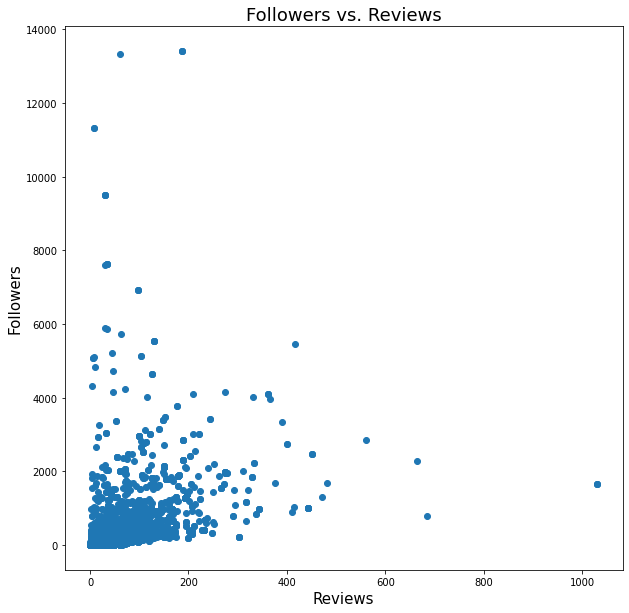

In [ ]:
# plotting followers vs reviews
plt.figure(figsize=(10,10))
plt.scatter(Dataset_reviews['Reviews'],Dataset_reviews['followers'])
plt.xlabel('Reviews',fontsize=15)
plt.ylabel('Followers',fontsize=15)
plt.title('Followers vs. Reviews',fontsize=18)

There are many customers with high followers or high reviews or both. Now the effect of the review to some other customers while they browse or for the concerned restaurant can be evalued by high frequent the reviwer is and how many people follow the reviewer. So taking top reviewers from both dimensions are necessary. 


In [ ]:
# making dataframe for critics
Critic_df=Dataset_reviews[(Dataset_reviews.Reviews>=400)  | ((Dataset_reviews.followers>=4000) & (Dataset_reviews.Reviews>=100))][['Reviewer','Reviews','followers']]
Critic_df.sort_values(by='Reviews', ascending=False,inplace=True)
Critic_df.drop_duplicates(keep='first', inplace=True)
Critic_df.reset_index(drop=True,inplace=True)
Critic_df.drop([19],inplace=True)
Critic_df.reset_index(drop=True,inplace=True)

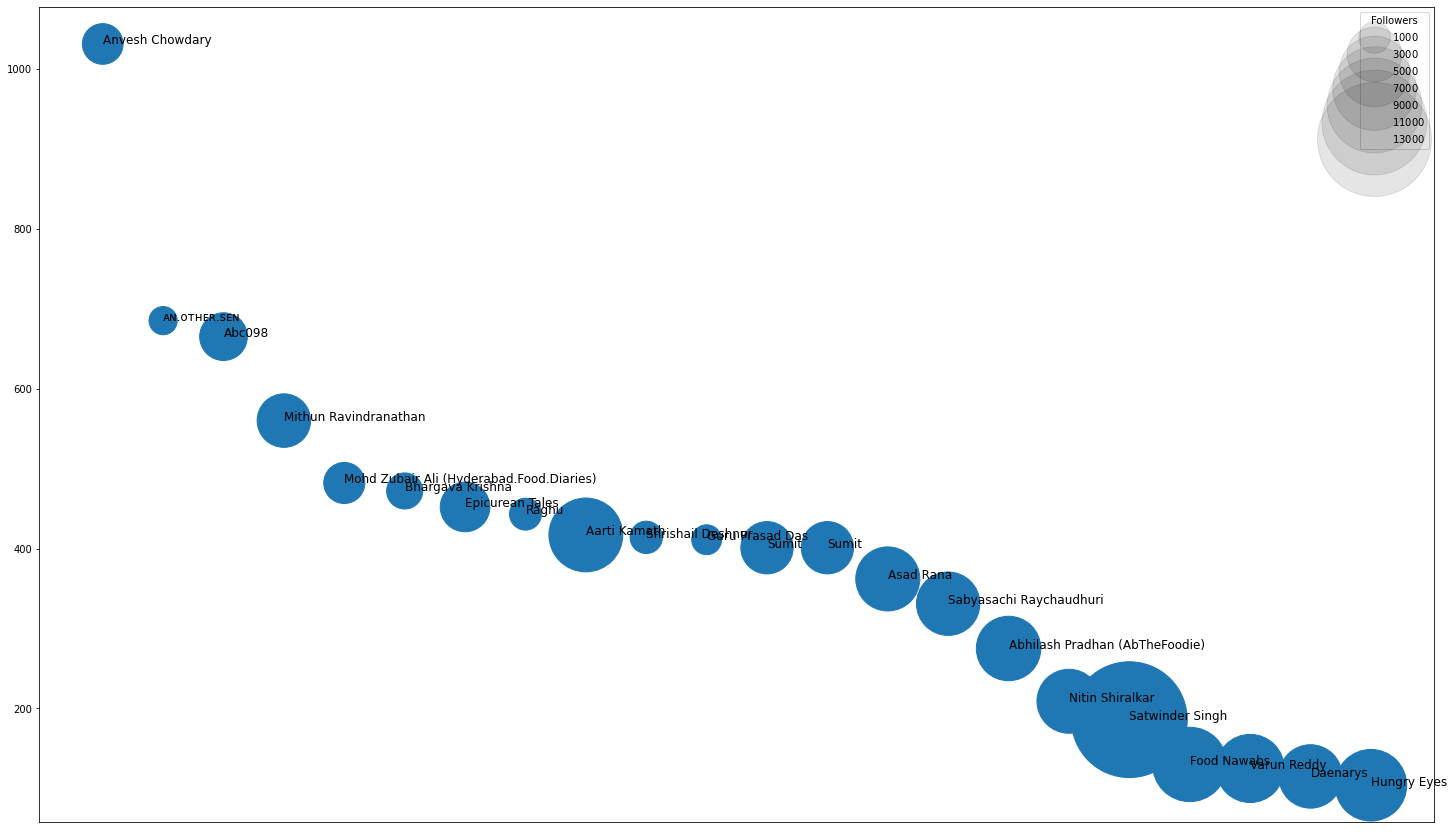

In [ ]:
# visualizing the critics numbers
plt.figure(figsize=(25,15))
scatter=plt.scatter(Critic_df.index,Critic_df.Reviews,s=Critic_df.followers)
plt.xticks([],[])
n=Critic_df.shape[0]
for i, txt in enumerate(Critic_df.Reviewer):
    plt.annotate(txt, (Critic_df.index[i],Critic_df.Reviews[i]),size=12)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.1)
legend = plt.legend(handles[0::2], labels[0::2], loc="upper right", title="Followers")
plt.show()


As we can see Some critics with high number of reviews like Avnesh Chowdhary, ABC098, Mithun Ravidranathan are considered to be the top critics. On the other hand reviewers like Satwender Singh, Food Nawabs, Aarthi Kamath, hungry Eyes with high number of follweres are also top critics as a reviwer with high number of followers can affect the sales of the restaurants.


In [ ]:
# nlp stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# loading stop words
StopWords = nltk.corpus.stopwords.words('english')
StopWords.append('.')

In [ ]:
# Function for removing stop words from corpus
def remove_stopwords(list_str):
  text = [word for word in list_str if word not in StopWords]
  return text


In [ ]:
# fuction for further text cleaning
def keep_negation_sw(text):
    """
    A function to save negation words (n't, not, no) from removing as stopwords
    """
    # to replace "n't" with "not"
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    # to join not/no into the next word
    text = re.sub("not ", " NOT", text)
    text = re.sub("no ", " NO", text)
    return text


In [ ]:
# function for tokenizing the words in a review statement
def tokenize(text):
        """
        A function to tokenize words of the text
        """        
        non_alphanumeric_pattern =r"[^a-zA-Z]"

        # to substitute multiple whitespace with single whitespace
        text = ' '.join(text.split())
        text = text.lower()
        text = keep_negation_sw(text)
        text = re.sub(non_alphanumeric_pattern," ", text).strip()
        tokenized_text = text.split()
        tokenized_text = remove_stopwords(tokenized_text)
        lmtzr = WordNetLemmatizer()
        tokenized_text=[lmtzr.lemmatize(word, 'v') for word in tokenized_text]
        return tokenized_text

In [ ]:
# applying the functions
Dataset_reviews['tokenized_text']=Dataset_reviews.Review.apply(tokenize)

In [ ]:
# finding the tokenized text length
Dataset_reviews['tokenized_text_len'] =Dataset_reviews['tokenized_text'].apply(len)


In [ ]:
Dataset_reviews.head()

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers,tokenized_text,tokenized_text_len
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25 15:54:00,1,2,"[ambience, good, food, quite, good, saturday, ...",24
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25 14:20:00,3,2,"[ambience, good, pleasant, even, service, prom...",14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24 22:54:00,2,3,"[must, try, great, food, great, ambience, thnx...",19
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24 22:11:00,1,1,"[soumen, das, arun, great, guy, behavior, sinc...",14
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24 21:37:00,3,2,"[food, good, order, kodi, drumsticks, basket, ...",17


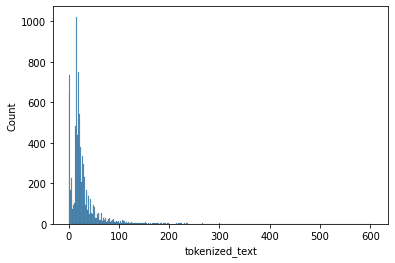

In [ ]:
# plotting the tokenized text length distribution plot
sns.histplot(Dataset_reviews['tokenized_text'].apply(len))

In [ ]:
Dataset_reviews[(Dataset_reviews['tokenized_text_len'])==0]

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers,tokenized_text,tokenized_text_len
1583,KFC,Tasleem,😄,5.0,0,2018-07-26 23:27:00,0,0,[],0
2090,13 Dhaba,Medhavi,D,5.0,0,2018-08-21 15:30:00,1,0,[],0
3583,Green Bawarchi Restaurant,Pagoti Appanna,5,5.0,0,2018-08-01 13:04:00,2,0,[],0
3736,Kritunga Restaurant,Kanna Shree,4,4.0,0,2018-09-12 22:35:00,1,10,[],0
3743,Kritunga Restaurant,ARUN TILAK S,o,5.0,0,2018-08-16 20:38:00,1,1,[],0
3784,Kritunga Restaurant,Pallavi Proddatoor,.,5.0,0,2018-07-25 20:25:00,0,0,[],0
4281,Karachi Cafe,Vivek Nayak,a,5.0,0,2018-07-26 23:59:00,0,1,[],0
4565,Owm Nom Nom,Pagoti Appanna,4,3.0,0,2018-07-28 14:02:00,2,0,[],0
4573,Owm Nom Nom,Sai Krishna,💝,5.0,0,2018-07-25 21:11:00,0,0,[],0
4582,Owm Nom Nom,Suneetha Bhumireddy,😊,5.0,0,2018-07-22 21:21:00,1,0,[],0


As we can see some reviews are not in the usable format, dropping such rows for further analysis.

In [ ]:
# dropping the unusable rows
Dataset_reviews.drop(index=Dataset_reviews[(Dataset_reviews['tokenized_text_len'])==0].index,axis=1,inplace=True)

In [ ]:
Dataset_reviews[(Dataset_reviews['tokenized_text_len'])==0]

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers,tokenized_text,tokenized_text_len


## WordCloud

In [ ]:
# bulding the whole corpus
corpus=[]
for token in Dataset_reviews['tokenized_text']:
  corpus.append(token)
  
corpus= [item for sublist in corpus for item in sublist]
len(corpus)


274165

In [ ]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
words_corpus=' '.join(np.array(corpus))

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate((str(words_corpus))) 

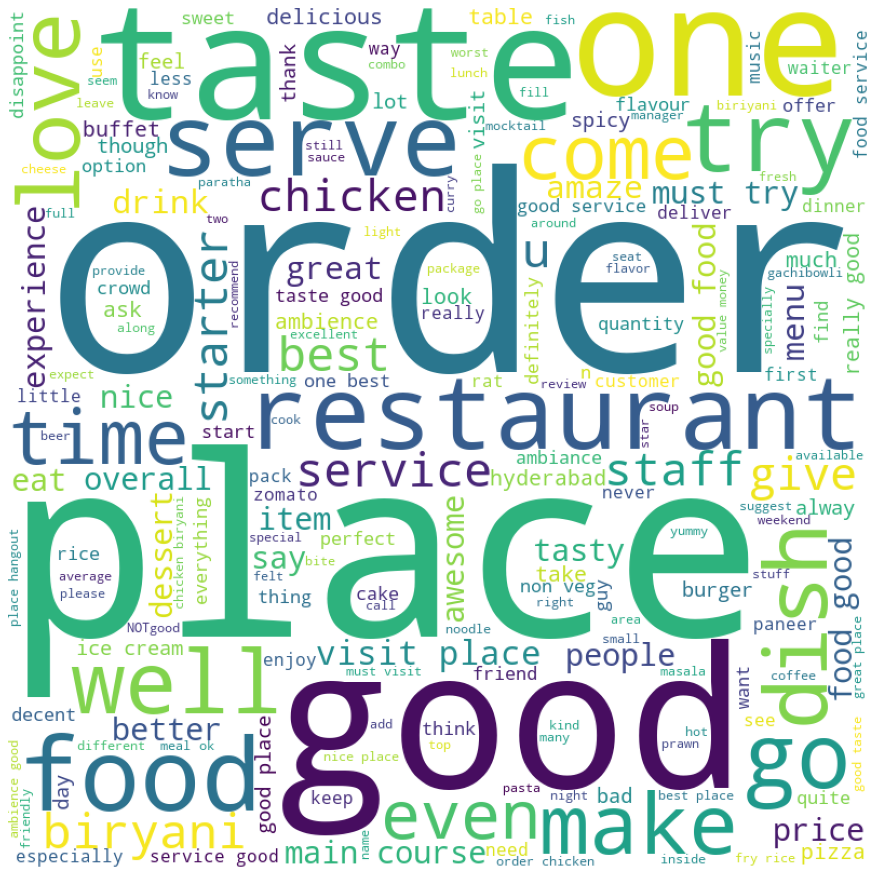

In [ ]:
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Top Words for different Sentiments

In [ ]:
import collections

In [ ]:
# applying the counter on corpus
counted_words = collections.Counter(corpus)

Total_words = []
Total_counts = []
for letter, count in counted_words.most_common(10):
    Total_words.append(letter)
    Total_counts.append(count)

In [ ]:
print(Total_words)
print(Total_counts)


['good', 'food', 'place', 'order', 'service', 'chicken', 'taste', 'ambience', 'time', 'try']
[6990, 6636, 6073, 3587, 3334, 3091, 2982, 2123, 2060, 2021]


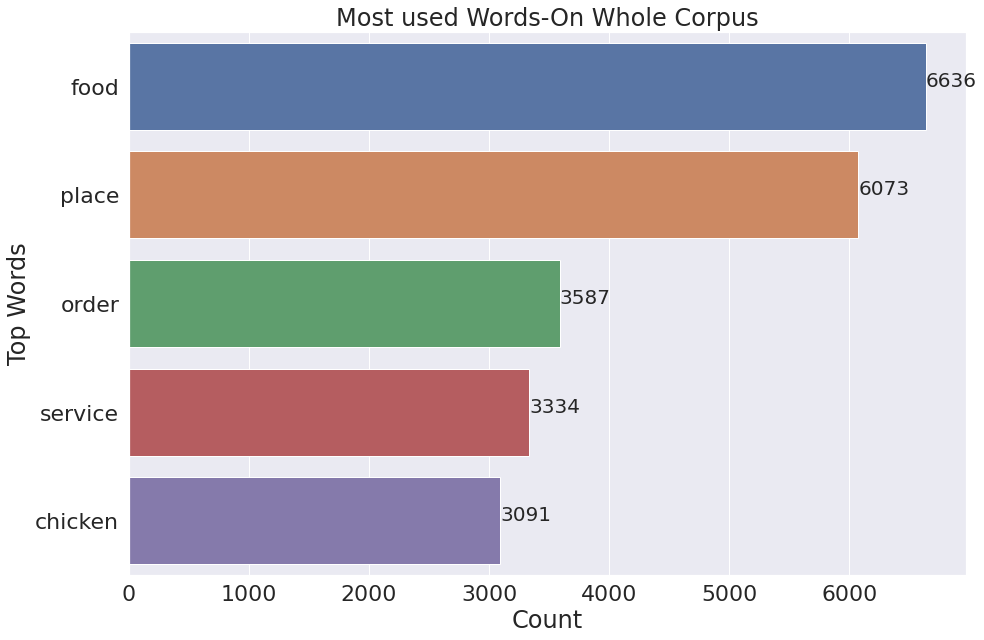

In [ ]:
# plotting the most used words in corpus
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax=sns.barplot(x=Total_counts[1:6],y=Total_words[1:6])
for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.4)
  _y = p.get_y() + p.get_height()/2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=20)
plt.title('Most used Words-On Whole Corpus')
plt.xlabel('Count')
plt.ylabel('Top Words')
plt.show()


Now according to rating the whole corpus can be divided in to three categories, namely positive for rating above 3, negative for below 3 and neutral for rating equal to 3.

In [ ]:
# function for relabling the rating
def label_rating(rating):
  if rating>3:
    return 'pos'
  elif rating<3:
    return 'neg'
  else:
    return 'nue'



In [ ]:
Dataset_reviews['Rating_Category']=Dataset_reviews['Rating'].apply(label_rating)


In [ ]:
Dataset_reviews_Sentiment=Dataset_reviews.groupby(by='Rating_Category',axis=0)

In [ ]:
# building pos,neg and nue corpus
df_pos=Dataset_reviews_Sentiment.get_group('pos')
df_neg=Dataset_reviews_Sentiment.get_group('neg')
df_nue=Dataset_reviews_Sentiment.get_group('nue')


### Positive Corpus

In [ ]:
# positively rated corpus
pos_corpus=[]

for token in df_pos['tokenized_text']:
  pos_corpus.append(token)
  
pos_corpus= [item for sublist in pos_corpus for item in sublist]
len(pos_corpus)


175199

In [ ]:
pos_counted_words = collections.Counter(pos_corpus)

pos_words = []
pos_counts = []
for letter, count in pos_counted_words.most_common(10):
    pos_words.append(letter)
    pos_counts.append(count)
print(pos_words)
print(pos_counts)

['good', 'place', 'food', 'service', 'chicken', 'taste', 'great', 'try', 'order', 'ambience']
[5321, 4441, 4273, 2224, 1954, 1857, 1620, 1608, 1587, 1558]


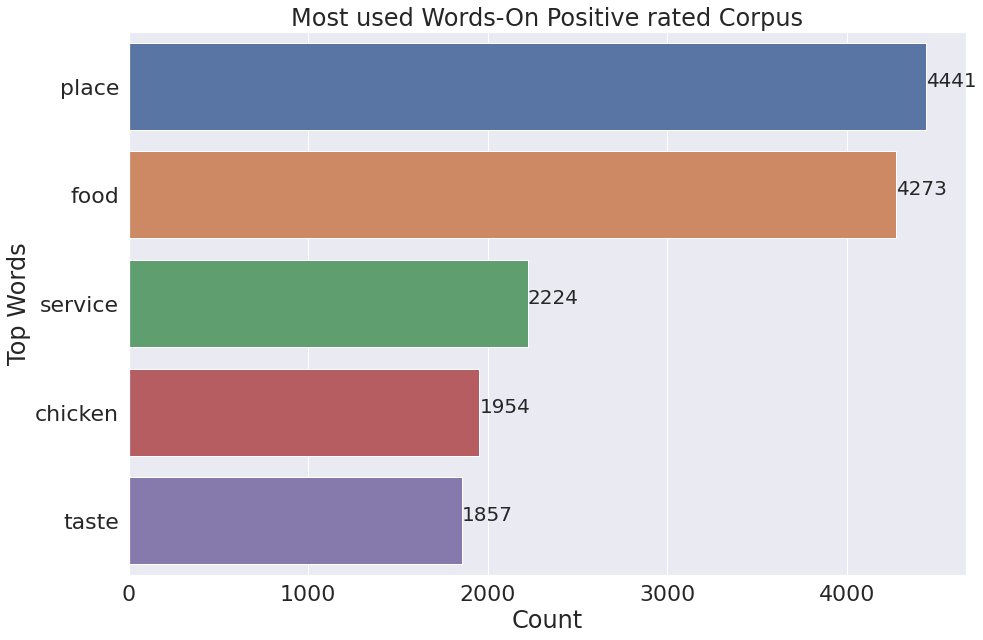

In [ ]:
# Most used Words-On Positive rated Corpus
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax=sns.barplot(x=pos_counts[1:6],y=pos_words[1:6])
for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.4)
  _y = p.get_y() + p.get_height()/2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=20)
plt.title('Most used Words-On Positive rated Corpus')
plt.xlabel('Count')
plt.ylabel('Top Words')
plt.show()


### Negative Corpus

In [ ]:
neg_corpus=[]

for token in df_neg['tokenized_text']:
  neg_corpus.append(token)
  
neg_corpus= [item for sublist in neg_corpus for item in sublist]
len(neg_corpus)


62361

In [ ]:
neg_counted_words = collections.Counter(neg_corpus)

neg_words = []
neg_counts = []
for letter, count in neg_counted_words.most_common(10):
    neg_words.append(letter)
    neg_counts.append(count)
print(neg_words)
print(neg_counts)

['food', 'order', 'place', 'service', 'chicken', 'good', 'taste', 'bad', 'worst', 'time']
[1496, 1470, 918, 678, 658, 647, 633, 535, 527, 500]


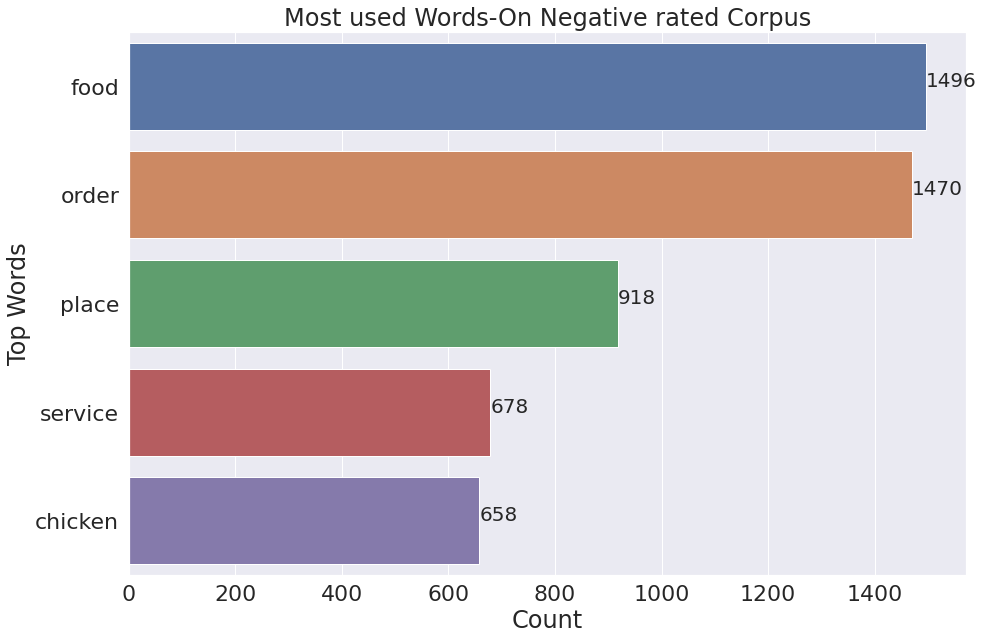

In [ ]:
#Most used Words-On negative rated Corpus
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax=sns.barplot(x=neg_counts[0:5],y=neg_words[0:5])
for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.4)
  _y = p.get_y() + p.get_height()/2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=20)
plt.title('Most used Words-On Negative rated Corpus')
plt.xlabel('Count')
plt.ylabel('Top Words')
plt.show()


### neutral Corpus

In [ ]:
nue_corpus=[]

for token in df_nue['tokenized_text']:
  nue_corpus.append(token)
  
nue_corpus= [item for sublist in nue_corpus for item in sublist]
len(nue_corpus)


36605

In [ ]:
nue_counted_words = collections.Counter(nue_corpus)

nue_words = []
nue_counts = []
for letter, count in nue_counted_words.most_common(10):
    nue_words.append(letter)
    nue_counts.append(count)
print(nue_words)
print(nue_counts)

['good', 'food', 'place', 'order', 'taste', 'chicken', 'service', 'ambience', 'go', 'try']
[1022, 867, 714, 530, 492, 479, 432, 366, 256, 250]


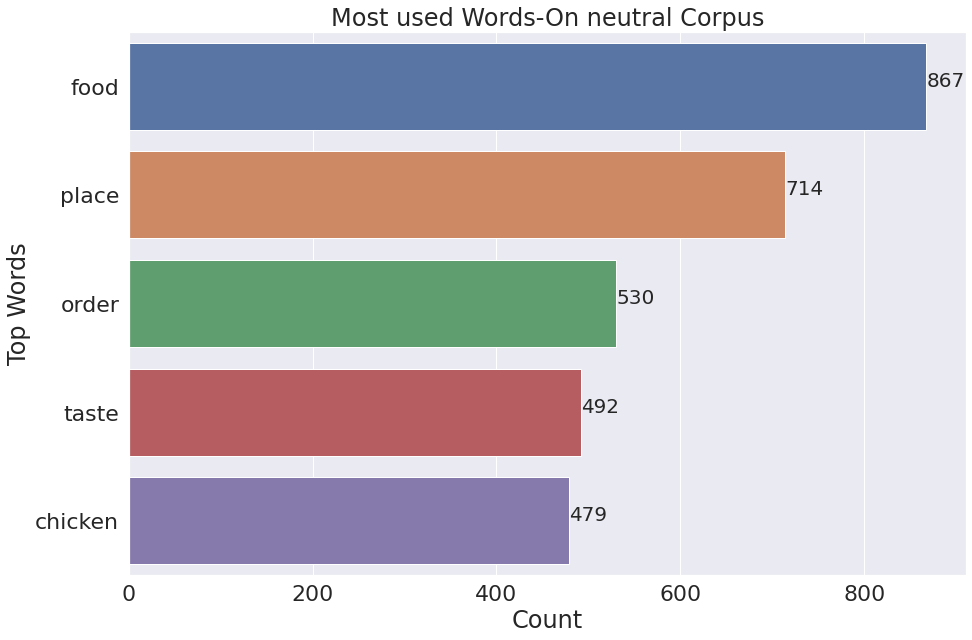

In [ ]:
#Most used Words-On neutral rated Corpus
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax=sns.barplot(x=nue_counts[1:6],y=nue_words[1:6])
for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.4)
  _y = p.get_y() + p.get_height()/2 
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=20)
plt.title('Most used Words-On neutral Corpus')
plt.xlabel('Count')
plt.ylabel('Top Words')
plt.show()


## Sentiment By Top Words

In [ ]:
# top words list
Top_words=['food','order','taste','place','service','ambience','chicken']

In [ ]:
# sentiment count for top words
stacked_top_words=dict()
for word in Top_words:
  list1=[pos_counted_words[word],nue_counted_words[word],neg_counted_words[word]]
  stacked_top_words[word]=list1
stacked_top_words

{'food': [4273, 867, 1496],
 'order': [1587, 530, 1470],
 'taste': [1857, 492, 633],
 'place': [4441, 714, 918],
 'service': [2224, 432, 678],
 'ambience': [1558, 366, 199],
 'chicken': [1954, 479, 658]}

In [ ]:
# sentiment fractions for top words
stacked_top_words_per=dict()
for word in Top_words:
  arr=np.array([pos_counted_words[word],nue_counted_words[word],neg_counted_words[word]])*100/counted_words[word]
  stacked_top_words_per[word]=arr
stacked_top_words_per

{'food': array([64.39119952, 13.06509946, 22.54370102]),
 'order': array([44.24310008, 14.77557848, 40.98132144]),
 'taste': array([62.27364185, 16.49899396, 21.22736419]),
 'place': array([73.12695538, 11.75695702, 15.1160876 ]),
 'service': array([66.70665867, 12.95740852, 20.33593281]),
 'ambience': array([73.38671691, 17.23975506,  9.37352803]),
 'chicken': array([63.21578777, 15.49660304, 21.28760919])}

In [ ]:
DF_top_words=pd.DataFrame(stacked_top_words_per.values(),columns=['positive','neutral','negative'])

In [ ]:
DF_top_words.index=stacked_top_words_per.keys()
DF_top_words

,positive,neutral,negative
food,64.391200,13.065099,22.543701
order,44.243100,14.775578,40.981321
taste,62.273642,16.498994,21.227364
place,73.126955,11.756957,15.116088
service,66.706659,12.957409,20.335933
ambience,73.386717,17.239755,9.373528
chicken,63.215788,15.496603,21.287609


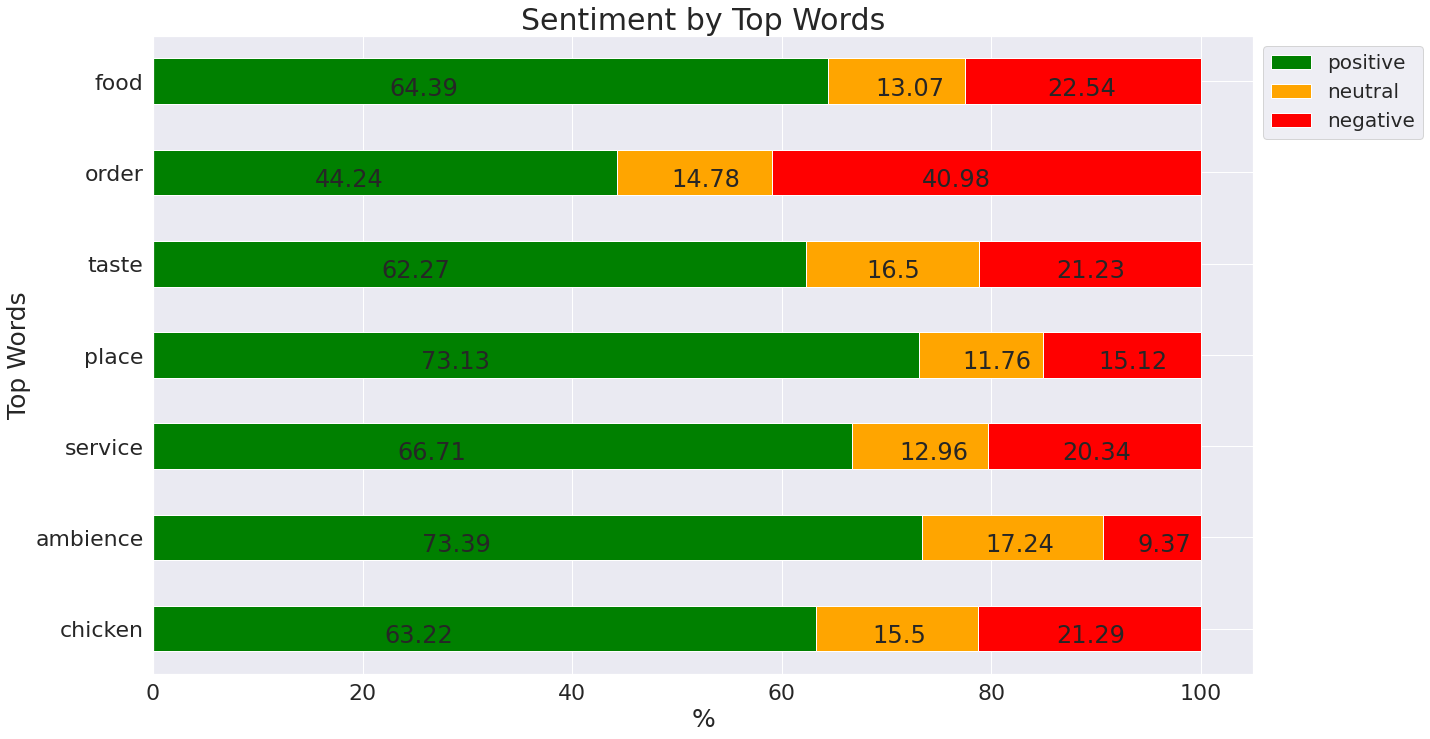

In [ ]:
# plotting sentiment fractions for top words
ax=DF_top_words.plot(kind='barh', stacked=True, color=['green','orange','red'],figsize=(20,10))
plt.legend(bbox_to_anchor=(1,1),fontsize=20)
plt.tight_layout()
plt.title('Sentiment by Top Words',fontsize=30)
plt.xlabel('%',fontsize=25)
plt.ylabel('Top Words',fontsize=25)
plt.gca().invert_yaxis()
for i,p in enumerate(ax.patches):
  value=np.round(p.get_width(),decimals=2)
  xy=(p.get_x()+(p.get_width())*0.35,p.get_y()+0.4)
  ax.annotate(value,xy)
plt.show()


## Sentiment Over Time

For findiing sentiment over time, year month data must be extracted from date column.

In [ ]:
# extracting year, month, quarter data from date column
Dataset_reviews['Year']=Dataset_reviews['Date_Time'].dt.year
Dataset_reviews['Quarter']=Dataset_reviews['Date_Time'].dt.quarter
Dataset_reviews['Month']=Dataset_reviews['Date_Time'].dt.month
Dataset_reviews

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers,tokenized_text,tokenized_text_len,Rating_Category,Year,Quarter,Month
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25 15:54:00,1,2,"[ambience, good, food, quite, good, saturday, ...",24,pos,2019,2,5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25 14:20:00,3,2,"[ambience, good, pleasant, even, service, prom...",14,pos,2019,2,5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24 22:54:00,2,3,"[must, try, great, food, great, ambience, thnx...",19,pos,2019,2,5
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24 22:11:00,1,1,"[soumen, das, arun, great, guy, behavior, sinc...",14,pos,2019,2,5
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24 21:37:00,3,2,"[food, good, order, kodi, drumsticks, basket, ...",17,pos,2019,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,2016-06-05 00:08:00,53,54,"[madhumathi, mahajan, well, start, nice, court...",115,nue,2016,2,6
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,2016-06-04 22:01:00,2,53,"[place, never, disappoint, us, food, courteous...",32,pos,2016,2,6
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,2016-06-03 10:37:00,65,423,"[bad, rat, mainly, chicken, bone, find, veg, f...",153,neg,2016,2,6
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,2016-05-31 17:22:00,13,144,"[personally, love, prefer, chinese, food, coup...",39,pos,2016,2,5


In [ ]:
Dataset_reviews['year_quarter']=Dataset_reviews[["Year","Quarter"]].astype(str).agg('_'.join,axis=1)
Dataset_reviews

,Restaurant,Reviewer,Review,Rating,Pictures,Date_Time,Reviews,followers,tokenized_text,tokenized_text_len,Rating_Category,Year,Quarter,Month,year_quarter
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25 15:54:00,1,2,"[ambience, good, food, quite, good, saturday, ...",24,pos,2019,2,5,2019_2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25 14:20:00,3,2,"[ambience, good, pleasant, even, service, prom...",14,pos,2019,2,5,2019_2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24 22:54:00,2,3,"[must, try, great, food, great, ambience, thnx...",19,pos,2019,2,5,2019_2
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24 22:11:00,1,1,"[soumen, das, arun, great, guy, behavior, sinc...",14,pos,2019,2,5,2019_2
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24 21:37:00,3,2,"[food, good, order, kodi, drumsticks, basket, ...",17,pos,2019,2,5,2019_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,2016-06-05 00:08:00,53,54,"[madhumathi, mahajan, well, start, nice, court...",115,nue,2016,2,6,2016_2
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,2016-06-04 22:01:00,2,53,"[place, never, disappoint, us, food, courteous...",32,pos,2016,2,6,2016_2
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,2016-06-03 10:37:00,65,423,"[bad, rat, mainly, chicken, bone, find, veg, f...",153,neg,2016,2,6,2016_2
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,2016-05-31 17:22:00,13,144,"[personally, love, prefer, chinese, food, coup...",39,pos,2016,2,5,2016_2


In [ ]:
df_months=Dataset_reviews.groupby(by=['Month']).Rating_Category.value_counts()
Df_Month_stacked=pd.DataFrame(columns=['pos','nue','neg'])

In [ ]:
df_months.to_dict()


{(1, 'pos'): 404,
 (1, 'neg'): 154,
 (1, 'nue'): 94,
 (2, 'pos'): 435,
 (2, 'neg'): 182,
 (2, 'nue'): 102,
 (3, 'pos'): 637,
 (3, 'neg'): 286,
 (3, 'nue'): 142,
 (4, 'pos'): 810,
 (4, 'neg'): 287,
 (4, 'nue'): 148,
 (5, 'pos'): 1110,
 (5, 'neg'): 299,
 (5, 'nue'): 131,
 (6, 'pos'): 173,
 (6, 'neg'): 81,
 (6, 'nue'): 38,
 (7, 'pos'): 848,
 (7, 'neg'): 327,
 (7, 'nue'): 138,
 (8, 'pos'): 419,
 (8, 'neg'): 179,
 (8, 'nue'): 71,
 (9, 'pos'): 367,
 (9, 'neg'): 183,
 (9, 'nue'): 93,
 (10, 'pos'): 384,
 (10, 'neg'): 163,
 (10, 'nue'): 82,
 (11, 'pos'): 342,
 (11, 'neg'): 151,
 (11, 'nue'): 76,
 (12, 'pos'): 369,
 (12, 'neg'): 150,
 (12, 'nue'): 75}

In [ ]:
for key,value in (df_months.items()):
  Df_Month_stacked.loc[key[0],key[1]]=value

In [ ]:
Df_Month_stacked

,pos,nue,neg
1,404,94,154
2,435,102,182
3,637,142,286
4,810,148,287
5,1110,131,299
6,173,38,81
7,848,138,327
8,419,71,179
9,367,93,183
10,384,82,163


In [ ]:

Df_Month_stacked_percentage = Df_Month_stacked.div(Df_Month_stacked.sum(axis=1), axis=0)*100
Df_Month_stacked_percentage

,pos,nue,neg
1,61.96319,14.417178,23.619632
2,60.500695,14.18637,25.312935
3,59.812207,13.333333,26.85446
4,65.060241,11.88755,23.052209
5,72.077922,8.506494,19.415584
6,59.246575,13.013699,27.739726
7,64.58492,10.510282,24.904798
8,62.630792,10.612855,26.756353
9,57.076205,14.463453,28.460342
10,61.049285,13.036566,25.914149


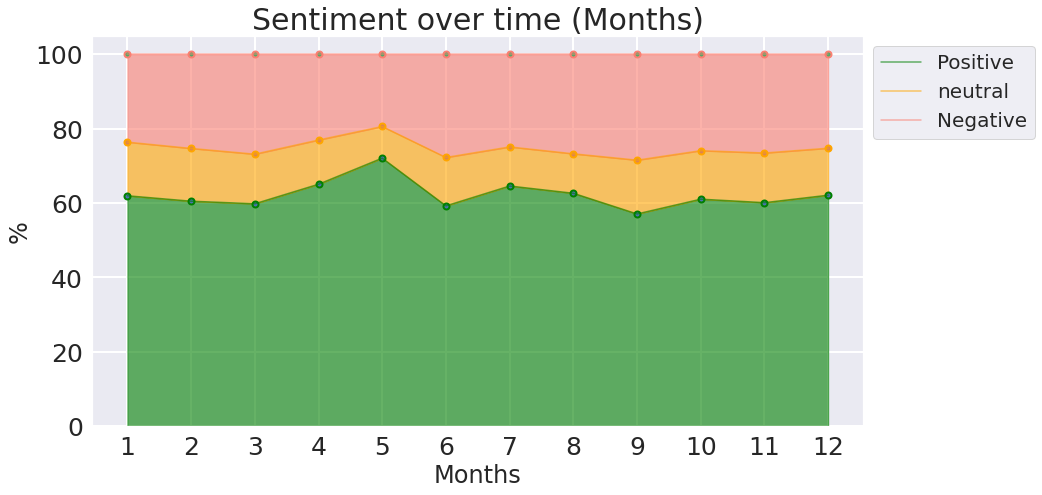

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting Sentiment over time (Months)
Df_Month_stacked_percentage.plot.area(figsize=(15,7),color=['green','orange','salmon'],xlabel='Months',ylabel='%',fontsize=25,alpha=0.6)
plt.scatter(Df_Month_stacked_percentage.index,Df_Month_stacked_percentage.pos,edgecolors='green',linewidth=2)
plt.scatter(Df_Month_stacked_percentage.index,Df_Month_stacked_percentage.pos+Df_Month_stacked_percentage.nue,edgecolors='orange',linewidth=2)
plt.scatter(Df_Month_stacked_percentage.index,Df_Month_stacked_percentage.sum(axis=1),edgecolors='salmon',linewidth=2)
plt.legend(['Positive','neutral','Negative'],bbox_to_anchor=(1,1),fontsize=20)
plt.tight_layout()
plt.title('Sentiment over time (Months)',fontsize=30)
plt.xticks(np.arange(1,13))
plt.grid(linestyle='-', linewidth=2)
plt.show()
plt.savefig('Sentiment over time.jpg')

Plotting the mean sentiment over time, month-wise, showed that there is spike in may month in positive reviews fraction. Apart from that there is no apparant variation.